In [1]:
## Since i am using python and following profs instrictions I am using a prebuilt solver to do my thing linprog in python
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [2]:
# proofits per car and truck
profit_per_car = 2000
profit_per_truck = 3300

In [3]:
c = [-profit_per_car, -profit_per_truck]
# Car, Truck and Total 
A = [[1, 0], [0, 1], [1, 1]]
b = [95, 75, 125]      

In [4]:
# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

# Lp
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
car_count, truck_count = result.x
max_profit = -result.fun 
print(f"Car production: {car_count}")
print(f"Truck production: {truck_count}")
print(f"Total Profit: ${max_profit}")

Car production: 50.0
Truck production: 75.0
Total Profit: $347500.0


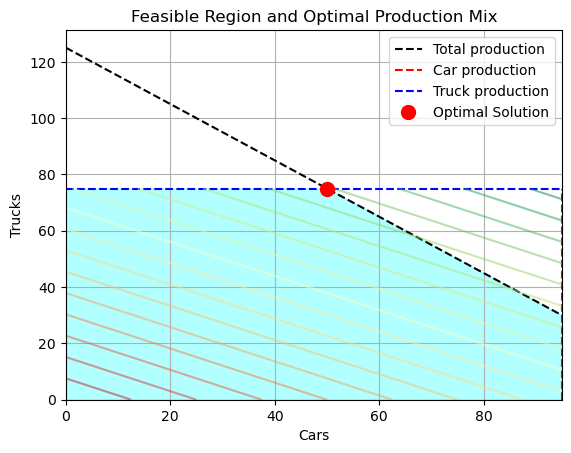

In [5]:
fig, ax = plt.subplots()
x_cars = np.linspace(0, 95, 100)
ax.plot(x_cars, (125 - x_cars), 'k--', label='Total production')  
ax.plot([95, 95], [0, 75], 'r--', label='Car production')         
ax.plot(x_cars, [75]*100, 'b--', label='Truck production') 
plt.fill_between(x_cars, 0, np.minimum(75, 125 - x_cars), color='cyan', alpha=0.3)
c_grid, t_grid = np.meshgrid(np.arange(0, 96), np.arange(0, 76))
profit_grid = profit_per_car * c_grid + profit_per_truck * t_grid
contours = ax.contour(c_grid, t_grid, profit_grid, levels=20, cmap="RdYlGn", alpha=0.5)
ax.plot(car_count, truck_count, 'ro', markersize=10, label='Optimal Solution', markerfacecolor='red')
ax.set_xlabel('Cars')
ax.set_ylabel('Trucks')
ax.set_title('Feasible Region and Optimal Production Mix')
ax.legend()
plt.grid(True)
plt.show()